# Metric 2 - gun seizures

In [9]:
import pandas as pd 
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

gun_seizures = pd.read_csv("gun_seizures.csv", index_col="_id") # use the column named _id as the row index



neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

gun_seizures.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
_id,,,,,,,,,,,,,,,,,,,
1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


 I am measuring the **amount of gun seizures by neighborhood.** There are two ways you could think about this in the context of a place to be “the best criminal”, that being the neighborhood with the **most** or **least** gun seizures. 
 
Most gun seizures alludes to there being more criminals in that neighborhood, which would be nice if you're a young and lonely aspiring criminal. Plus, this makes that neighborhood actually have more crime, which would be good for our aspiring criminals. 

### I will be finding the neighborhood with the most gun seizures. 


In [6]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum()

numseizures.sort_values(ascending=False)

neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64


each entry has a total guns seized column. I summed together the totals of these, grouping by neighborhood. This gives the sum of all of these counts based by neighborhood, in descending order. 

In [7]:


seizure_amount = dict()

for index, row in gun_seizures.iterrows():
    currenthood = row["neighborhood"]
    count = row["total_count"]
    
   
    if currenthood not in seizure_amount:
        seizure_amount[currenthood] = count 
    else:
        seizure_amount[currenthood] = count + seizure_amount[currenthood]
    
print(seizure_amount)

seizuredf = pd.DataFrame.from_dict(seizure_amount, orient="index", columns = ["amount"])
seizuredf = seizuredf.dropna()


seizuredf.tail(10)



{'Mount Oliver Borough': 9, 'Sheraden': 121, 'Terrace Village': 45, 'Brighton Heights': 149, nan: 1004, 'Westwood': 10, 'East Liberty': 148, 'Upper Lawrenceville': 20, 'Marshall-Shadeland': 148, 'Beechview': 101, 'East Hills': 137, 'Arlington': 40, 'Arlington Heights': 10, 'Mount Washington': 90, 'South Side Flats': 208, 'Hazelwood': 144, 'Homewood South': 345, 'Greenfield': 25, 'Bloomfield': 58, 'Beltzhoover': 46, 'Homewood North': 159, 'Upper Hill': 37, 'Perry South': 136, 'Lincoln-Lemington-Belmar': 136, 'Bedford Dwellings': 83, 'Homewood West': 61, 'Carrick': 148, 'Central Northside': 83, 'Chateau': 26, 'Fineview': 75, 'Chartiers City': 4, 'Larimer': 126, 'Polish Hill': 10, 'South Shore': 13, 'Highland Park': 42, 'Knoxville': 119, 'Lower Lawrenceville': 17, 'Allentown': 91, 'Spring Hill-City View': 77, 'Garfield': 95, 'Bluff': 58, 'Overbrook': 29, 'South Side Slopes': 40, 'Central Business District': 125, 'Banksville': 10, 'Perry North': 44, 'Friendship': 5, 'Crawford-Roberts': 57,

,amount
Oakwood,4
Windgap,15
Bon Air,12
North Shore,20
Lincoln Place,10
Mt. Oliver,4
West End,6
Esplen,10
Hays,8
Swisshelm Park,3


Does the same math operations, just saves in a dictionary, then to a pandas dataframe to be used for a map visualization 


neighborhood
Homewood South      345
South Side Flats    208
Homewood North      159
Brighton Heights    149
East Liberty        148
                   ... 
Mt. Oliver            4
Oakwood               4
Regent Square         4
Summer Hill           3
Swisshelm Park        3
Name: total_count, Length: 88, dtype: int64

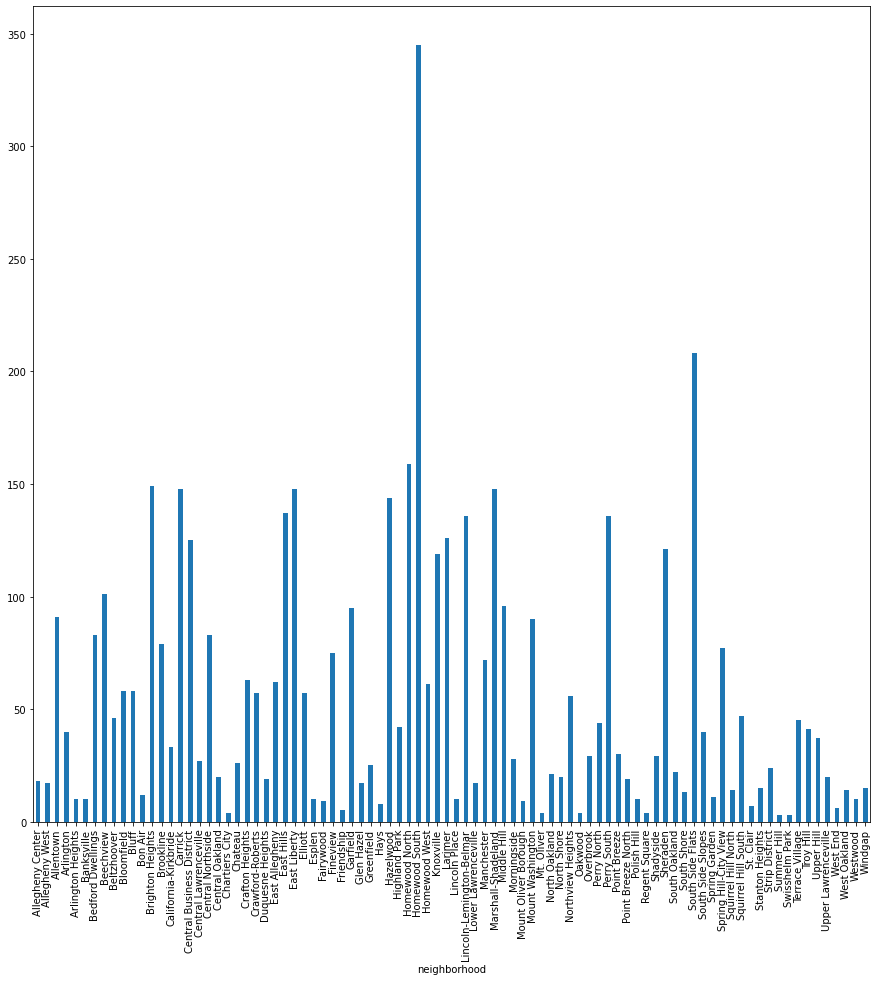

In [28]:
numseizures = gun_seizures.groupby("neighborhood")["total_count"].sum().plot(kind = "bar", figsize = (15,15))

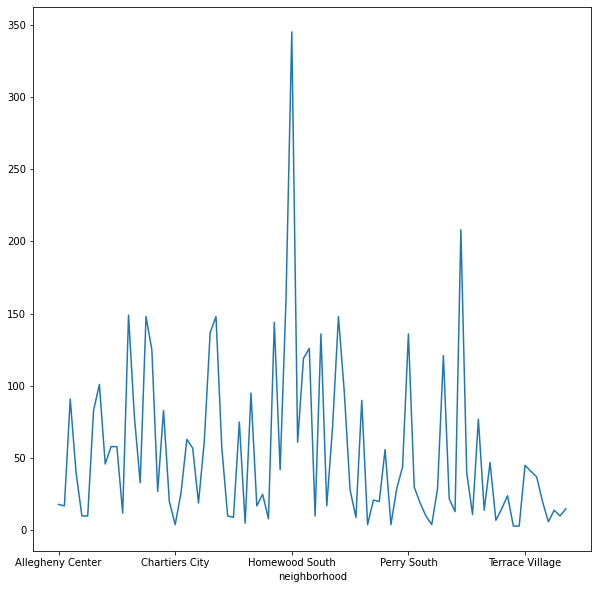

In [22]:
numseizures.plot(figsize=(10,10))

my data would seem to confirm that **Homewood South** overwhelmingly has the most firearm seizures, and the bar and regular graph support this conclusion. 

The graph visualization is a bit unruly, but does well at showing how much of a landslide this firearm value is than all the other neighborhoods.